# CREATE USEFUL MODEL FORCING (instead of MLD)
that affects kappa / mixing coefficient

- first of all, think about how to implement this, then perhaps create some "mixing" statistic, that actually checks how much mixing is going on
- then i can compare the MLD slab model with the box model, and keep the total mixing in ranges that are reasonable

but for this:
- constant kappa
- linked to 2015 MLD
- linked to 2018 pycnocline

NOTE:
/// for this I need to work on the model first of all

## Claudia & Jay - upwelling 21 deg isopycnal categories
/Strong upwelling	// Pycnoclin is >35  
/moderate upwelling	// pycnocline is >50, <35  
/weak upwelling	// Pycnocline starts to climb but is below 50m  

### but let's get MLD data and pycnocline data into this notebook for later modification


In [2]:
# packs <- c("tidyverse","cowplot","scales","oce")

# install.packages(packs)

In [3]:
require(tidyverse, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)
require(scales, warn.conflicts = FALSE)

require(oce, warn.conflicts = FALSE)

Loading required package: tidyverse

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.1       ✔ purrr   0.3.3  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loadin

In [4]:
# read MLD and euphotic depth file
MLD2EuZ <- read.csv("MLD2EuZ_2.csv")

# read Date column
MLD2EuZ$Date <- as.Date(MLD2EuZ$Date, format="%Y-%m-%d")

In [5]:
tail(MLD2EuZ)

,X,CruiseID,Date,MLD2015,MLD2019,x0.1,x1,x10,X21degC,X22degC
,<int>,<fct>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
193,202,93HG_194,2012-08-14,15,2.98,NA,NA,NA,89,78
194,203,93HG_195,2012-09-10,13,4.97,NA,NA,NA,115,108
195,204,93HG_196,2012-10-10,12,2.98,NA,NA,NA,122,116
196,205,93HG_197,2012-11-08,22,13.92,NA,NA,NA,120,109
197,206,93HG_198,2012-12-04,NA,16.90,NA,NA,NA,114,101
198,207,93HG_199,2013-03-13,NA,4.97,NA,NA,NA,46,27


Warning message:
“Removed 4 rows containing missing values (geom_path).”


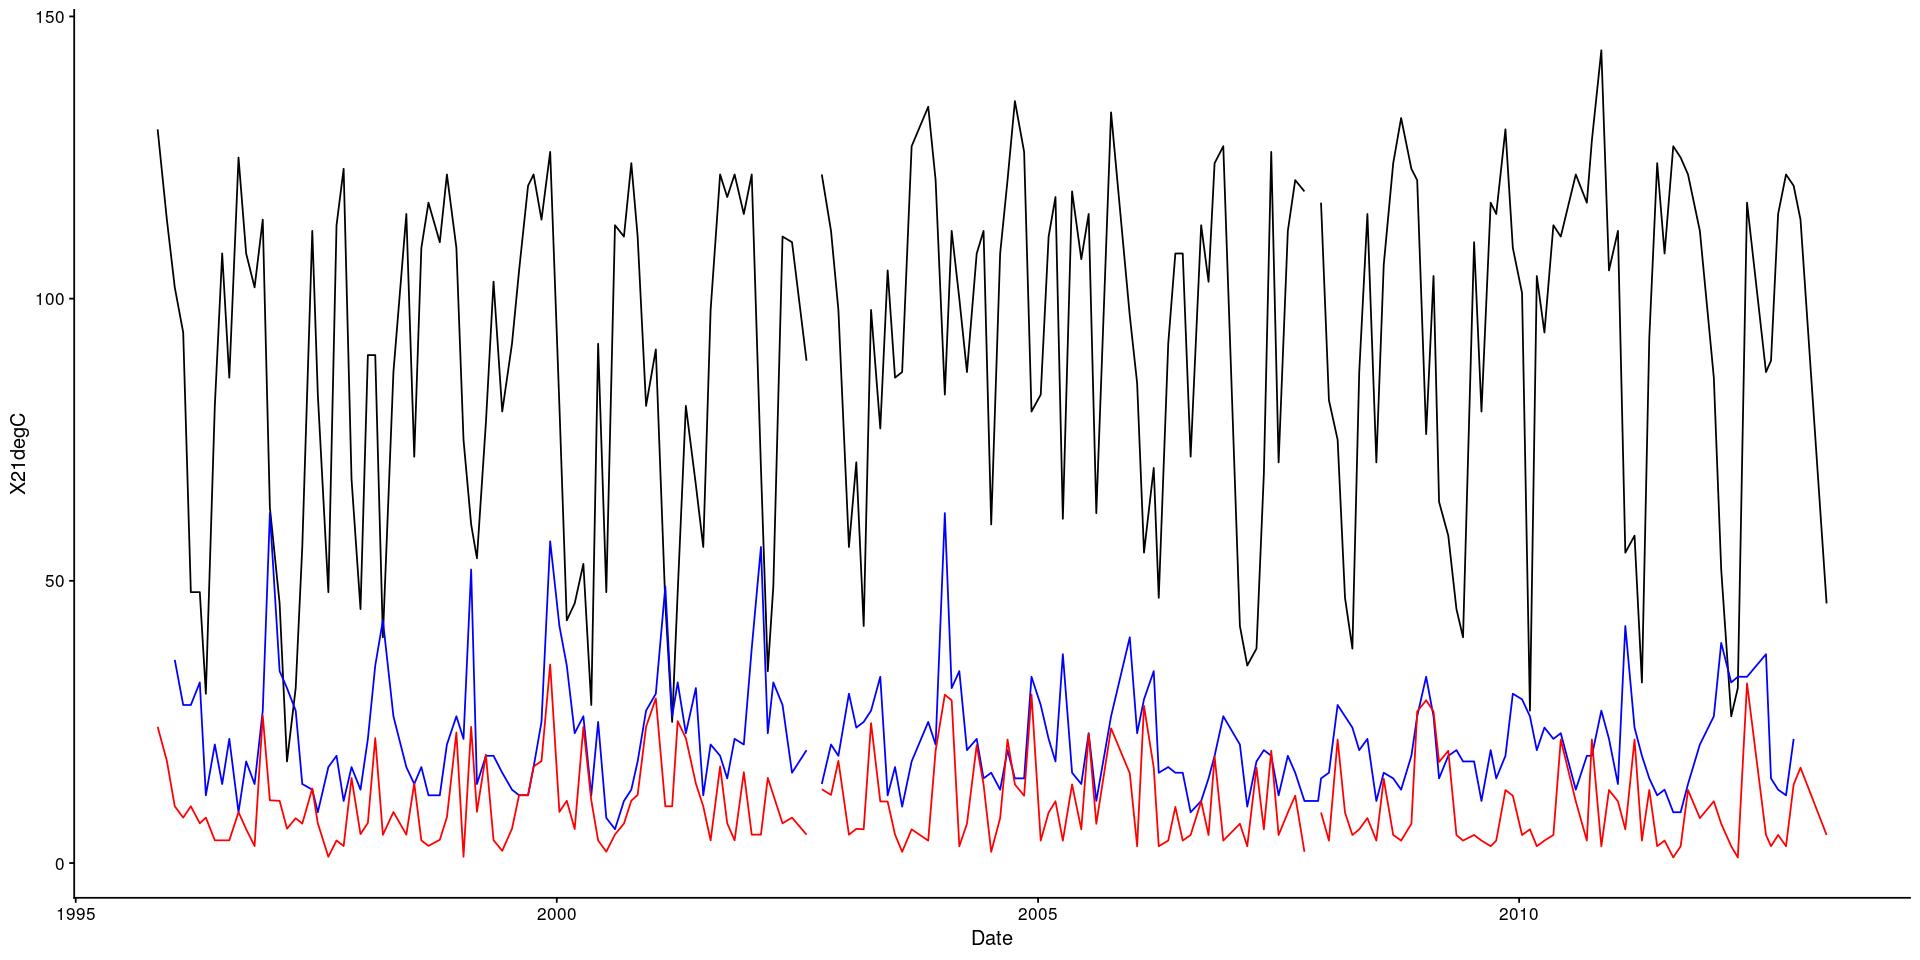

In [6]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(MLD2EuZ,aes(x=Date,y=X21degC)) + geom_line() + theme_cowplot(12) + geom_line(aes(x=Date,y=MLD2015),col='blue') + geom_line(aes(x=Date,y=MLD2019),col='red') 

In [7]:
cor.test(MLD2EuZ$MLD2019,MLD2EuZ$MLD2015)


	Pearson's product-moment correlation

data:  MLD2EuZ$MLD2019 and MLD2EuZ$MLD2015
t = 5.1853, df = 190, p-value = 5.496e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2215267 0.4702520
sample estimates:
      cor 
0.3520899 


In [8]:
cor.test(MLD2EuZ$MLD2019,MLD2EuZ$X21degC)


	Pearson's product-moment correlation

data:  MLD2EuZ$MLD2019 and MLD2EuZ$X21degC
t = 1.7039, df = 194, p-value = 0.09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01904778  0.25720445
sample estimates:
      cor 
0.1214291 


Warning message:
“Removed 4 rows containing missing values (geom_path).”


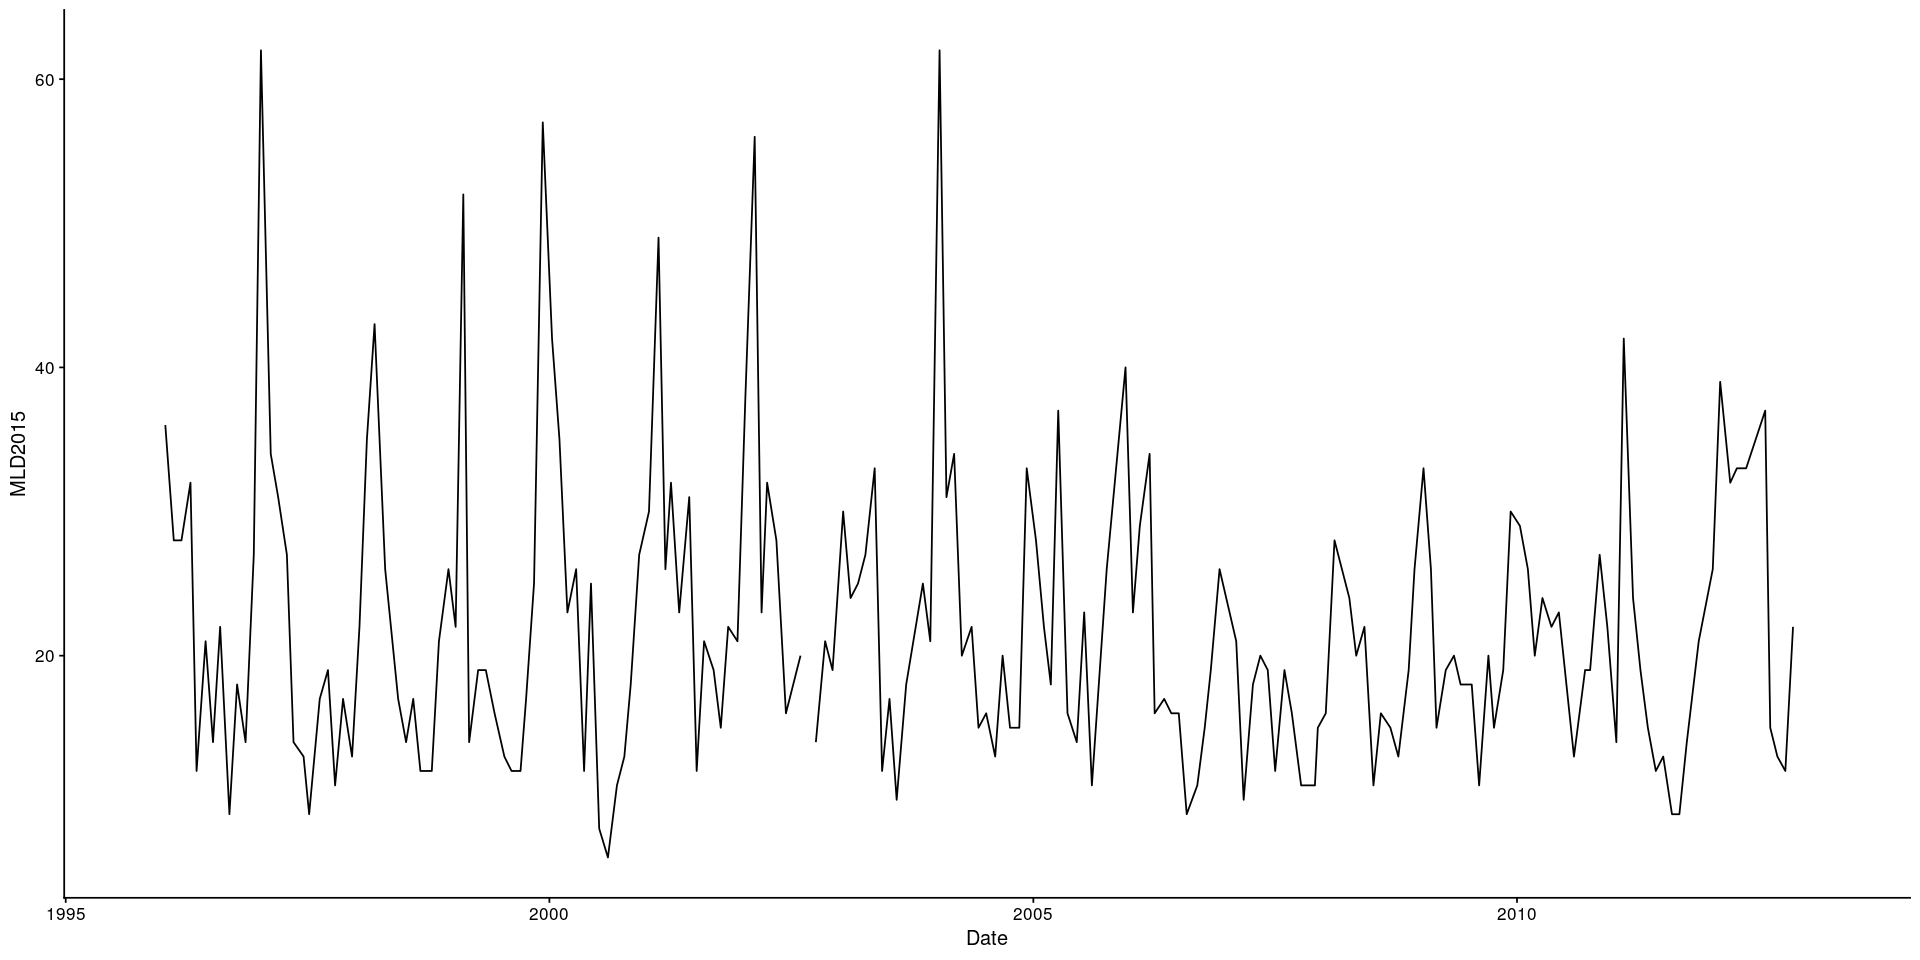

In [9]:
ggplot(MLD2EuZ,aes(x=Date,y=MLD2015)) + geom_line(aes(x=Date,y=MLD2015)) + theme_cowplot(12)

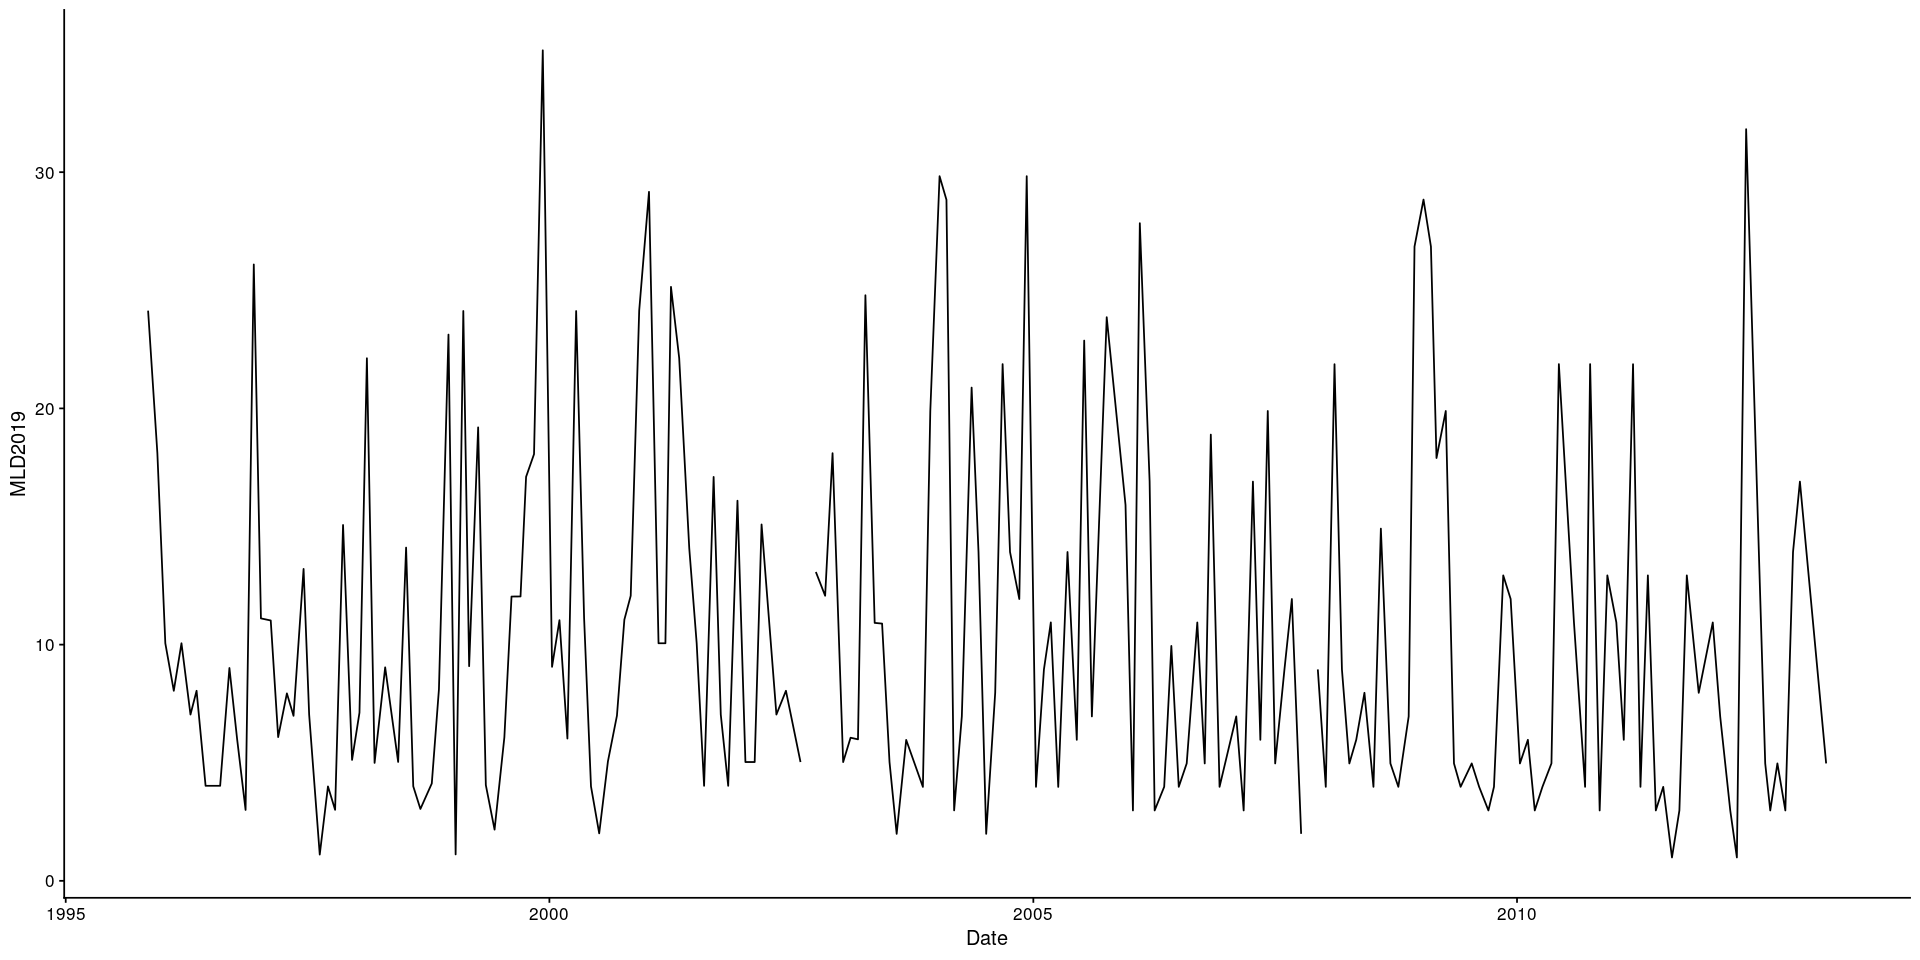

In [10]:
ggplot(MLD2EuZ,aes(x=Date,y=MLD2019)) + geom_line() + theme_cowplot(12)

# SPLIT INTO REGIMES AND ANALYZE ACCORDINGLY

In [11]:
MLD2019 = data.frame('date'= MLD2EuZ$Date,'depth' = MLD2EuZ$MLD2019)
MLD2015 = data.frame('date'= MLD2EuZ$Date,'depth' = MLD2EuZ$MLD2015)
X21Iso = data.frame('date'= MLD2EuZ$Date,'depth' = MLD2EuZ$X21degC)

In [12]:
#split data into two regimes:
R1begin = as.Date('2000-10-30') 
R1end = as.Date('1996-01-01')
R2begin = as.Date('2006-06-30')
R2end = as.Date('2010-12-31')

splittimeseries <- function(x){
    R1 <- x[!x$date>R1begin & !x$date<R1end,]
    R2 <- x[!x$date<R2begin & !x$date>R2end,]  
    
    R1$reg <- '1'
    R2$reg <- '2'
    
    R1$month <- format(R1$date, format="%m")
    R2$month <- format(R2$date, format="%m")
    
    R1ctDate <- as.POSIXlt(R1$date)
    R2ctDate <- as.POSIXlt(R2$date)
    
    R1$yday <- R1ctDate$yday
    R2$yday <- R2ctDate$yday
    
    RegComb <- rbind(R1,R2)
    
    return(RegComb)
}

In [13]:
MLD2019_split = splittimeseries(MLD2019)
MLD2015_split = splittimeseries(MLD2015)
X21Iso_split = splittimeseries(X21Iso)

In [14]:
print('X21Iso')
print('regime 1')
mean(X21Iso_split[X21Iso_split$reg == 1,]$depth)
sd(X21Iso_split[X21Iso_split$reg == 1,]$depth)
print('regime 2')
mean(X21Iso_split[X21Iso_split$reg == 2,]$depth, na.rm = T)
sd(X21Iso_split[X21Iso_split$reg == 2,]$depth, na.rm = T)

[1] "X21Iso"
[1] "regime 1"


[1] 83.87719

[1] 30.84412

[1] "regime 2"


[1] 94.7451

[1] 31.29654

In [15]:
print('MLD2019')
print('regime 1')
mean(MLD2019_split[MLD2019_split$reg == 1,]$depth)
sd(MLD2019_split[MLD2019_split$reg == 1,]$depth)
print('regime 2')
mean(MLD2019_split[MLD2019_split$reg == 2,]$depth, na.rm = T)
sd(MLD2019_split[MLD2019_split$reg == 2,]$depth, na.rm = T)

[1] "MLD2019"
[1] "regime 1"


[1] 9.590088

[1] 7.07769

[1] "regime 2"


[1] 9.670863

[1] 7.350313

In [16]:
print('MLD2015')
print('regime 1')
mean(MLD2015_split[MLD2015_split$reg == 1,]$depth)
sd(MLD2015_split[MLD2015_split$reg == 1,]$depth)
print('regime 2')
mean(MLD2015_split[MLD2015_split$reg == 2,]$depth)
sd(MLD2015_split[MLD2015_split$reg == 2,]$depth)

[1] "MLD2015"
[1] "regime 1"


[1] 21.96491

[1] 12.02373

[1] "regime 2"


[1] 19.07692

[1] 5.687434

# NOW i want a measure of productivity that helps to show the problem with the mixing term MLD
i.e. high productivity under low mixing...

In [28]:
PinckINTchla <- read.csv("PINTDF_integratedChlorophyll.csv")

In [29]:
PinckINTchla$date <- as.Date(PinckINTchla$Date )

In [30]:
CHLATS <- splittimeseries(PinckINTchla)

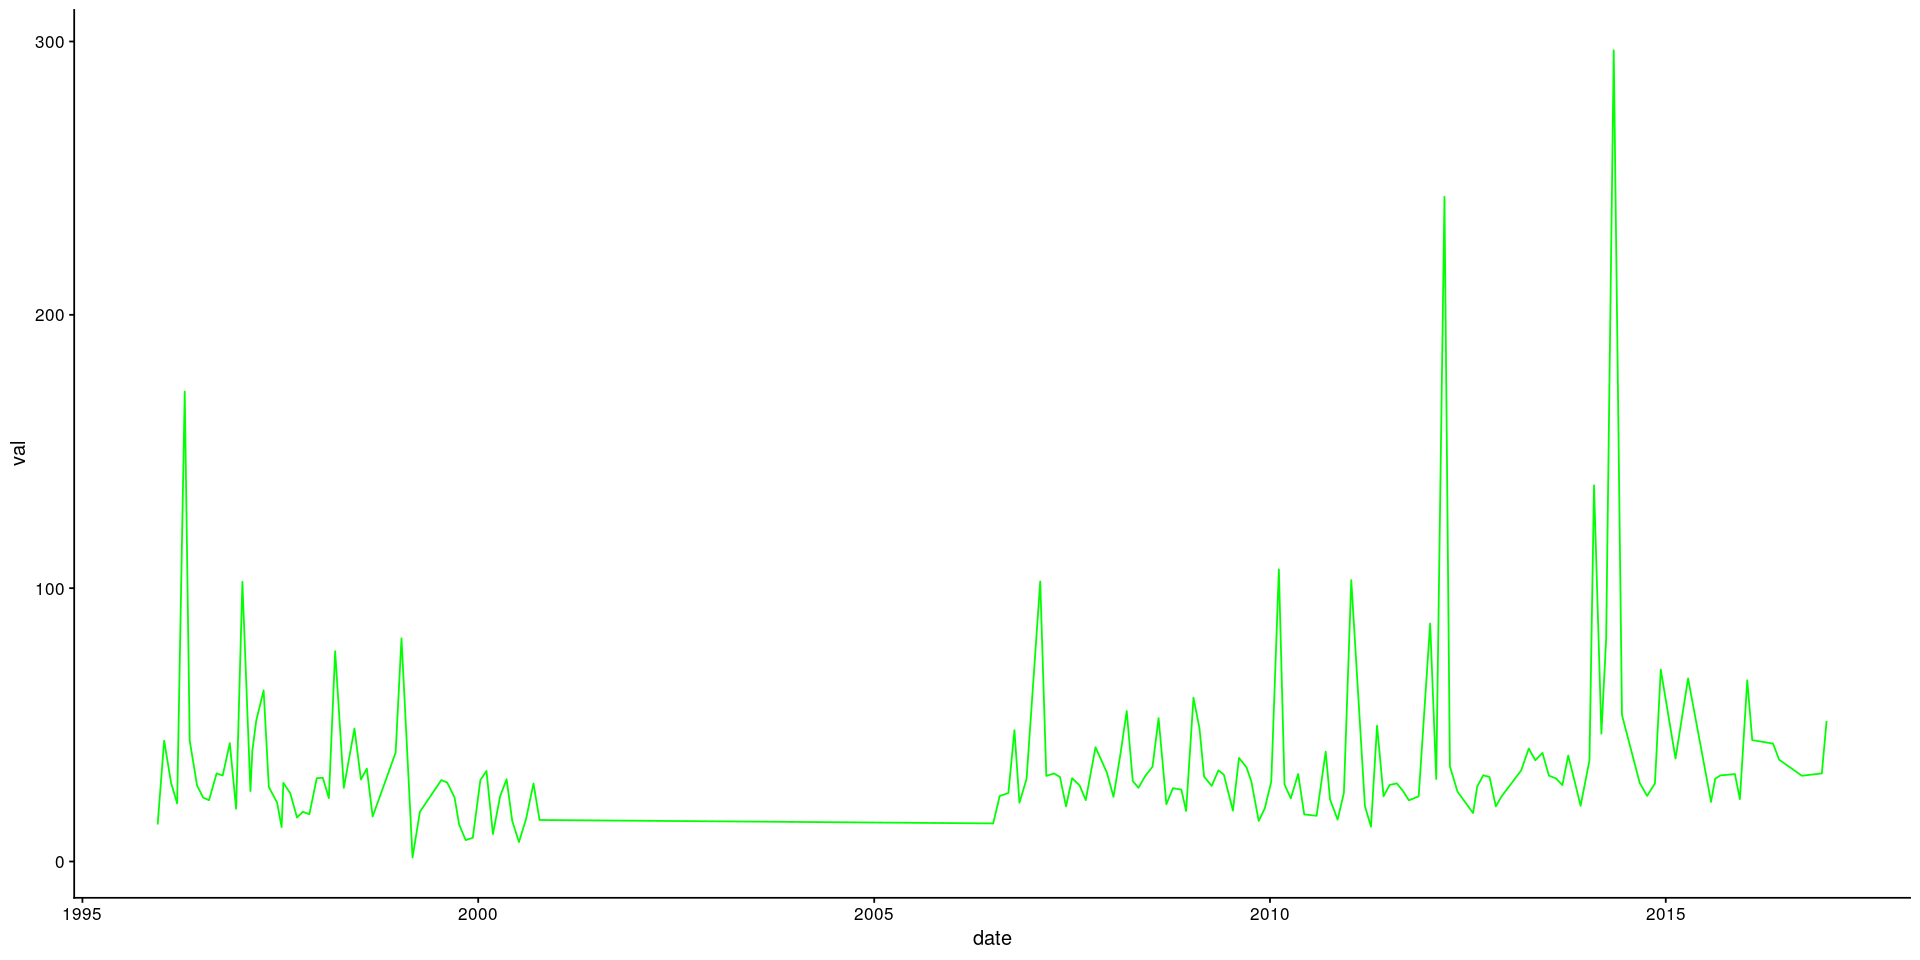

In [36]:
options(repr.plot.width=16, repr.plot.height=8)
#ggplot(MLD2EuZ,aes(x=Date,y=X21degC)) + geom_line() + theme_cowplot(12) + 
#geom_line(aes(x=Date,y=MLD2015),col='blue') + geom_line(aes(x=Date,y=MLD2019),col='red') +
ggplot()+
geom_line(data=PinckINTchla[PinckINTchla$spec == 'Tchla',],aes(x=date,y=val),col='green')  + theme_cowplot(12)

In [21]:
print('TChla')
print('regime 1')
mean(CHLATS[CHLATS$reg == 1  & CHLATS$spec=='Tchla', ]$val)
sd(CHLATS[CHLATS$reg == 1  & CHLATS$spec=='Tchla', ]$val)
print('regime 2')
mean(CHLATS[CHLATS$reg == 2 & CHLATS$spec=='Tchla',]$val, na.rm = T)
sd(CHLATS[CHLATS$reg == 2 & CHLATS$spec=='Tchla',]$val, na.rm = T)

[1] "TChla"
[1] "regime 1"


[1] 32.19593

[1] 26.76568

[1] "regime 2"


[1] 32.63412

[1] 17.87718

In [26]:
Teste = merge(X21Iso_split[X21Iso_split$reg == 2,],CHLATS[CHLATS$reg == 2  & CHLATS$spec=='Tchla', ])

Teste1 = merge(MLD2015_split[MLD2015_split$reg == 1,],CHLATS[CHLATS$reg == 1  & CHLATS$spec=='Tchla', ])


Teste2 = merge(MLD2019_split[MLD2019_split$reg == 1,],CHLATS[CHLATS$reg == 1  & CHLATS$spec=='Tchla', ])

In [27]:
cor.test(Teste$depth,Teste$val)


	Pearson's product-moment correlation

data:  Teste$depth and Teste$val
t = -4.1003, df = 44, p-value = 0.000175
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7080219 -0.2779165
sample estimates:
       cor 
-0.5257942 


In [24]:
head(X21Iso_split)

,date,depth,reg,month,yday
3,1996-01-12,102,1,01,11
4,1996-02-13,94,1,02,43
5,1996-03-13,48,1,03,72
6,1996-04-16,48,1,04,106
7,1996-05-09,30,1,05,129
8,1996-06-12,81,1,06,163


# Chlorophyll aggregated vs isopleth

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing missing values (geom_point).”


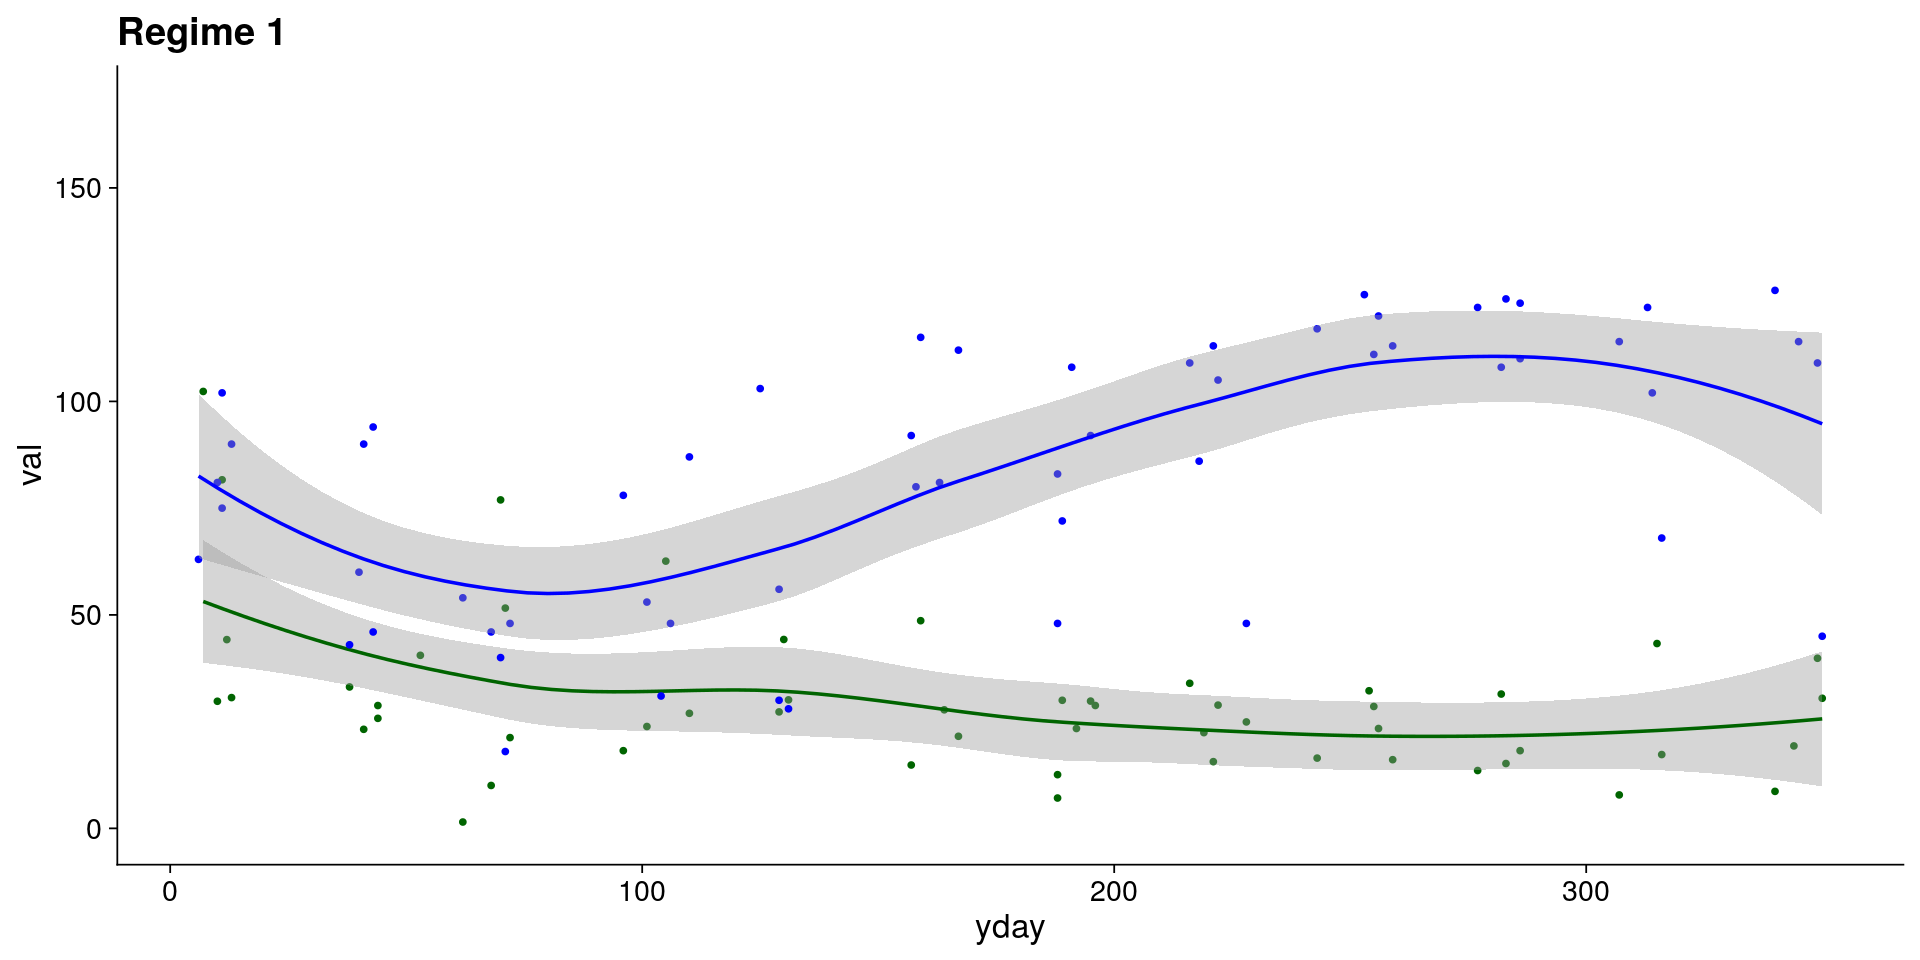

In [25]:
ggplot() + geom_point(data=CHLATS[CHLATS$reg == 1  & CHLATS$spec=='Tchla', ], aes(x=yday,y=val), col='darkgreen') + 
geom_smooth(data=CHLATS[CHLATS$reg == 1  & CHLATS$spec=='Tchla', ], aes(x=yday,y=val), col='darkgreen') +
geom_point(data=X21Iso_split[X21Iso_split$reg == 1, ], aes(x=yday,y=depth), col='blue') +
geom_smooth(data=X21Iso_split[X21Iso_split$reg == 1, ], aes(x=yday,y=depth), col='blue')+
ggtitle('Regime 1')+ ylim(0,170) +
theme_cowplot(20) 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


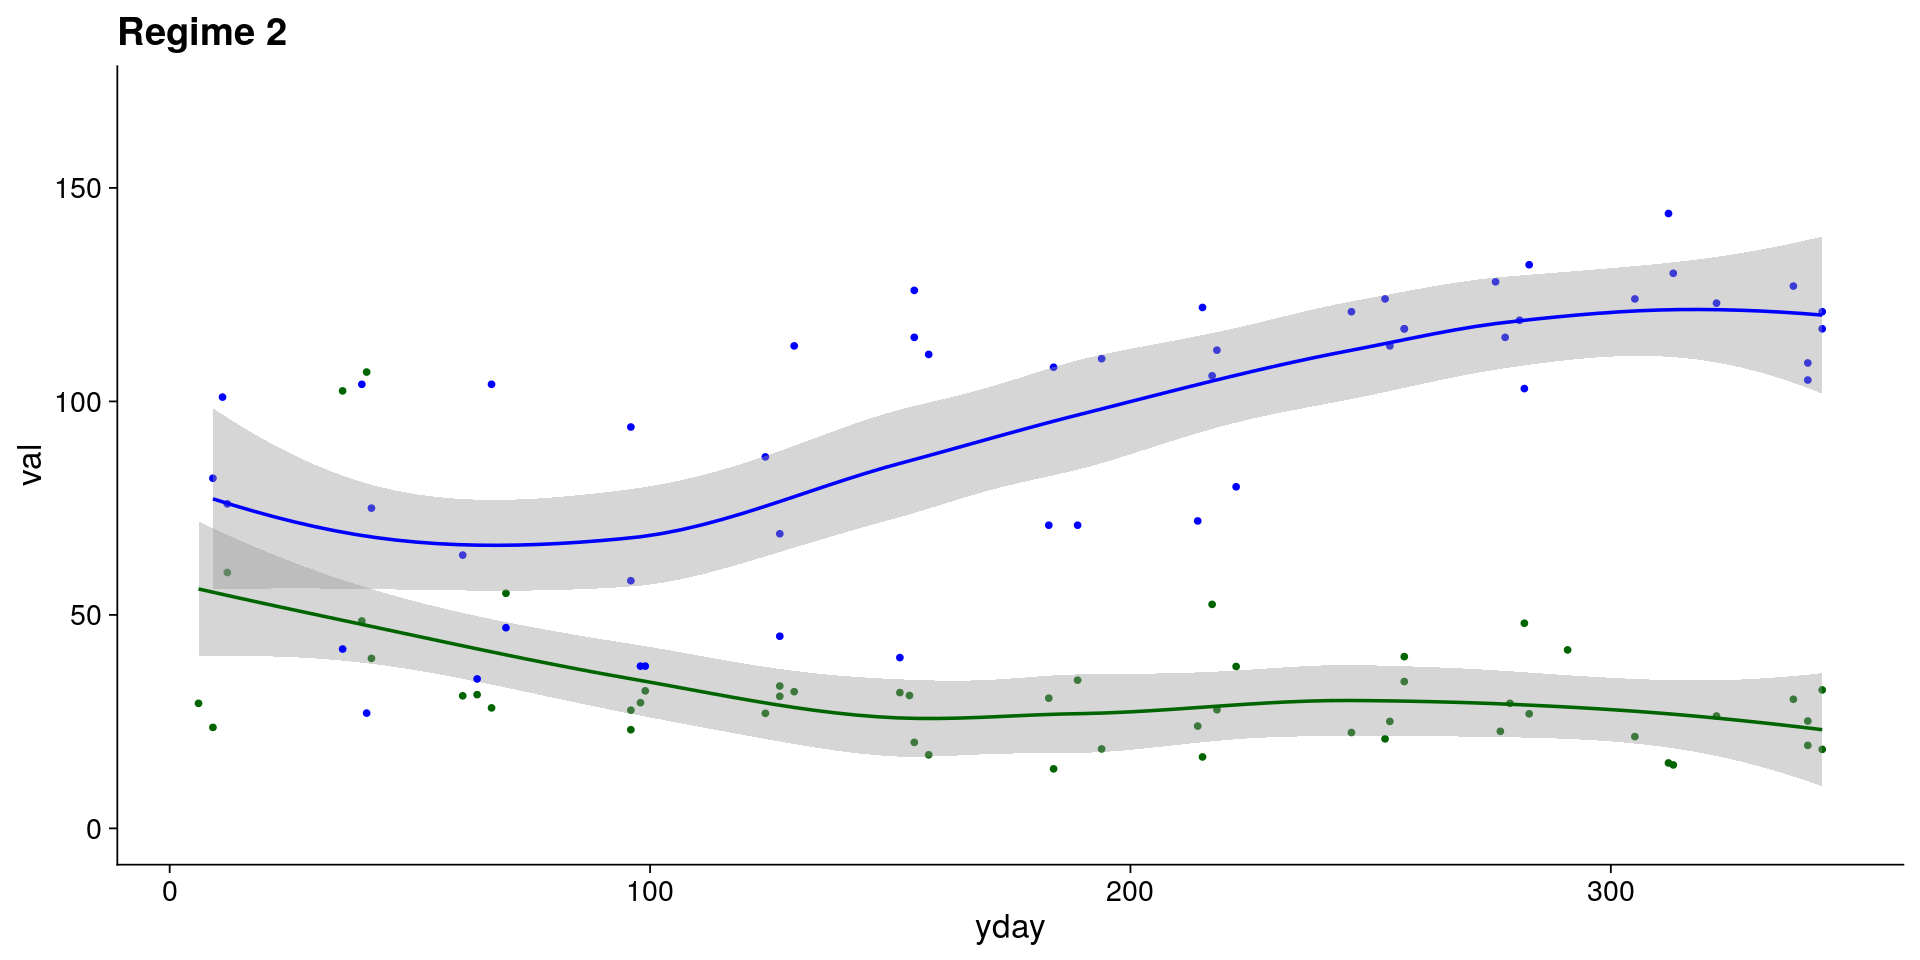

In [123]:
ggplot() + geom_point(data=CHLATS[CHLATS$reg == 2  & CHLATS$spec=='Tchla', ], aes(x=yday,y=val), col='darkgreen') + 
geom_smooth(data=CHLATS[CHLATS$reg == 2  & CHLATS$spec=='Tchla', ], aes(x=yday,y=val), col='darkgreen') +
geom_point(data=X21Iso_split[X21Iso_split$reg == 2, ], aes(x=yday,y=depth), col='blue') +
geom_smooth(data=X21Iso_split[X21Iso_split$reg == 2, ], aes(x=yday,y=depth), col='blue')+
ggtitle('Regime 2')+ ylim(0,170) +
theme_cowplot(20) 

# vs MLD

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing missing values (geom_point).”


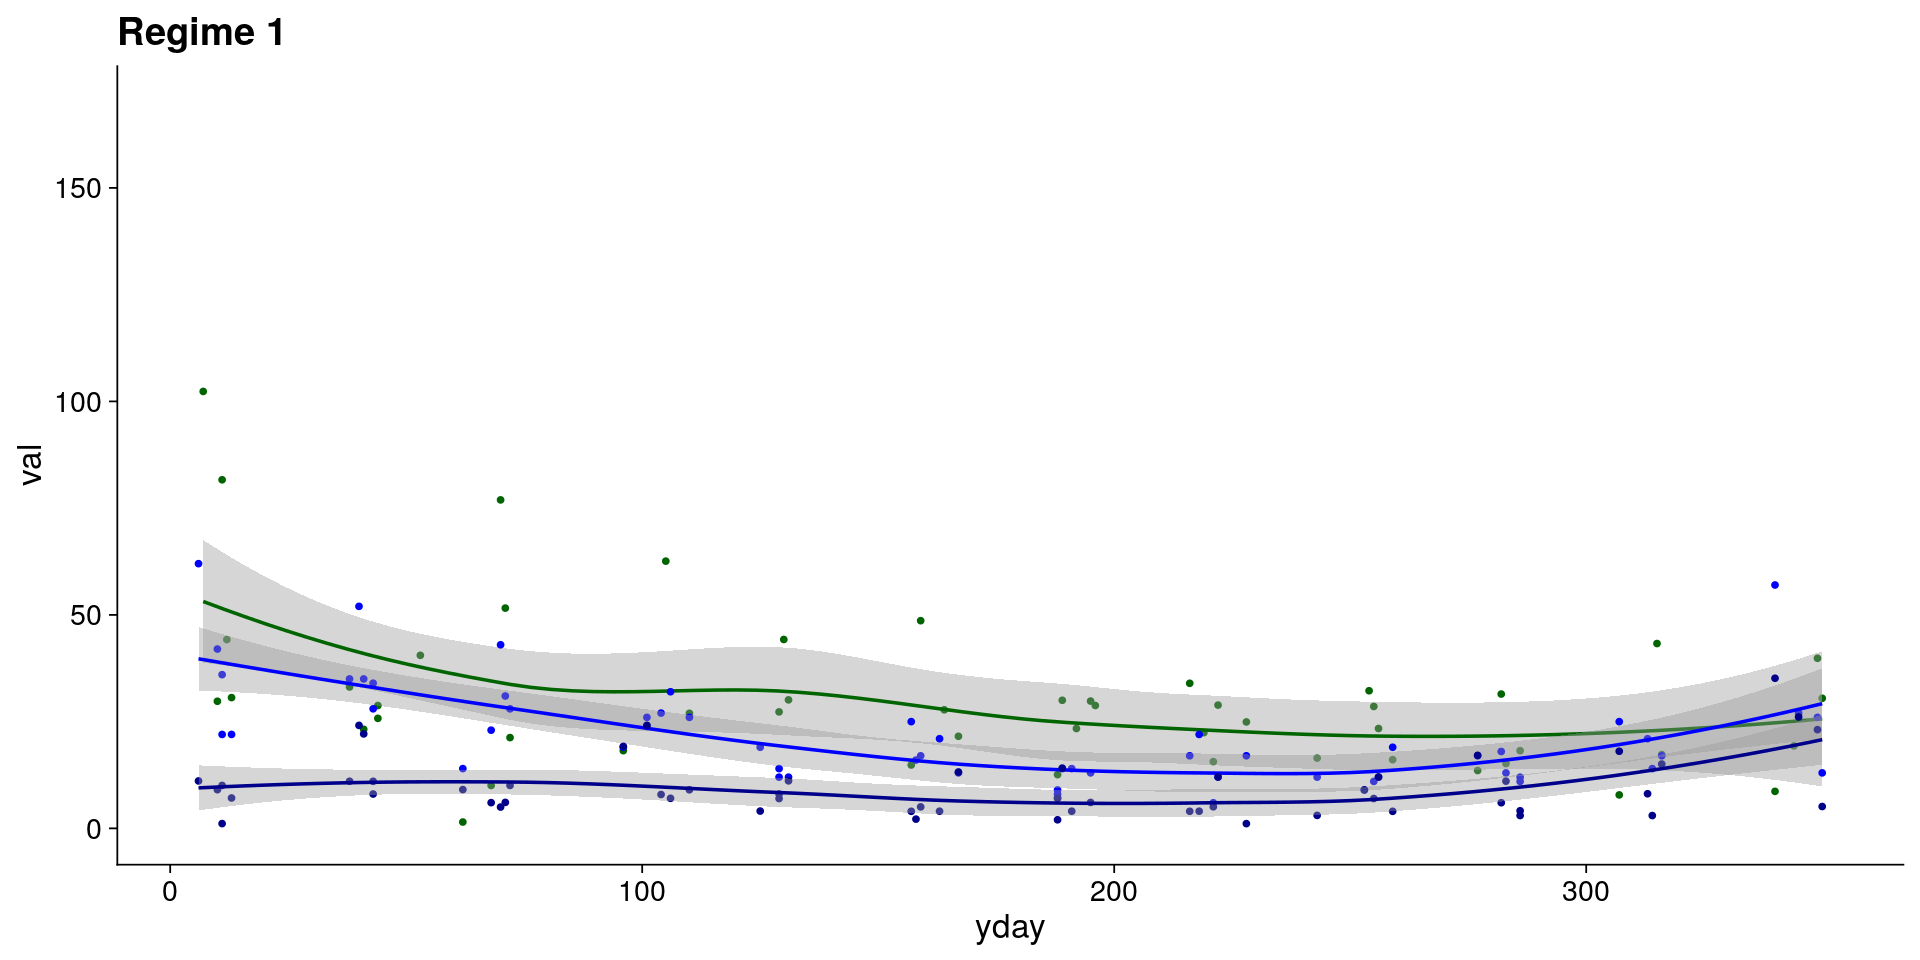

In [124]:
ggplot() + geom_point(data=CHLATS[CHLATS$reg == 1  & CHLATS$spec=='Tchla', ], aes(x=yday,y=val), col='darkgreen') + 
geom_smooth(data=CHLATS[CHLATS$reg == 1  & CHLATS$spec=='Tchla', ], aes(x=yday,y=val), col='darkgreen') +
geom_point(data=MLD2015_split[MLD2015_split$reg == 1, ], aes(x=yday,y=depth), col='blue') +
geom_smooth(data=MLD2015_split[MLD2015_split$reg == 1, ], aes(x=yday,y=depth), col='blue')+
geom_point(data=MLD2019_split[MLD2019_split$reg == 1, ], aes(x=yday,y=depth), col='darkblue') +
geom_smooth(data=MLD2019_split[MLD2019_split$reg == 1, ], aes(x=yday,y=depth), col='darkblue')+
ggtitle('Regime 1')+ ylim(0,170) +
theme_cowplot(20) 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


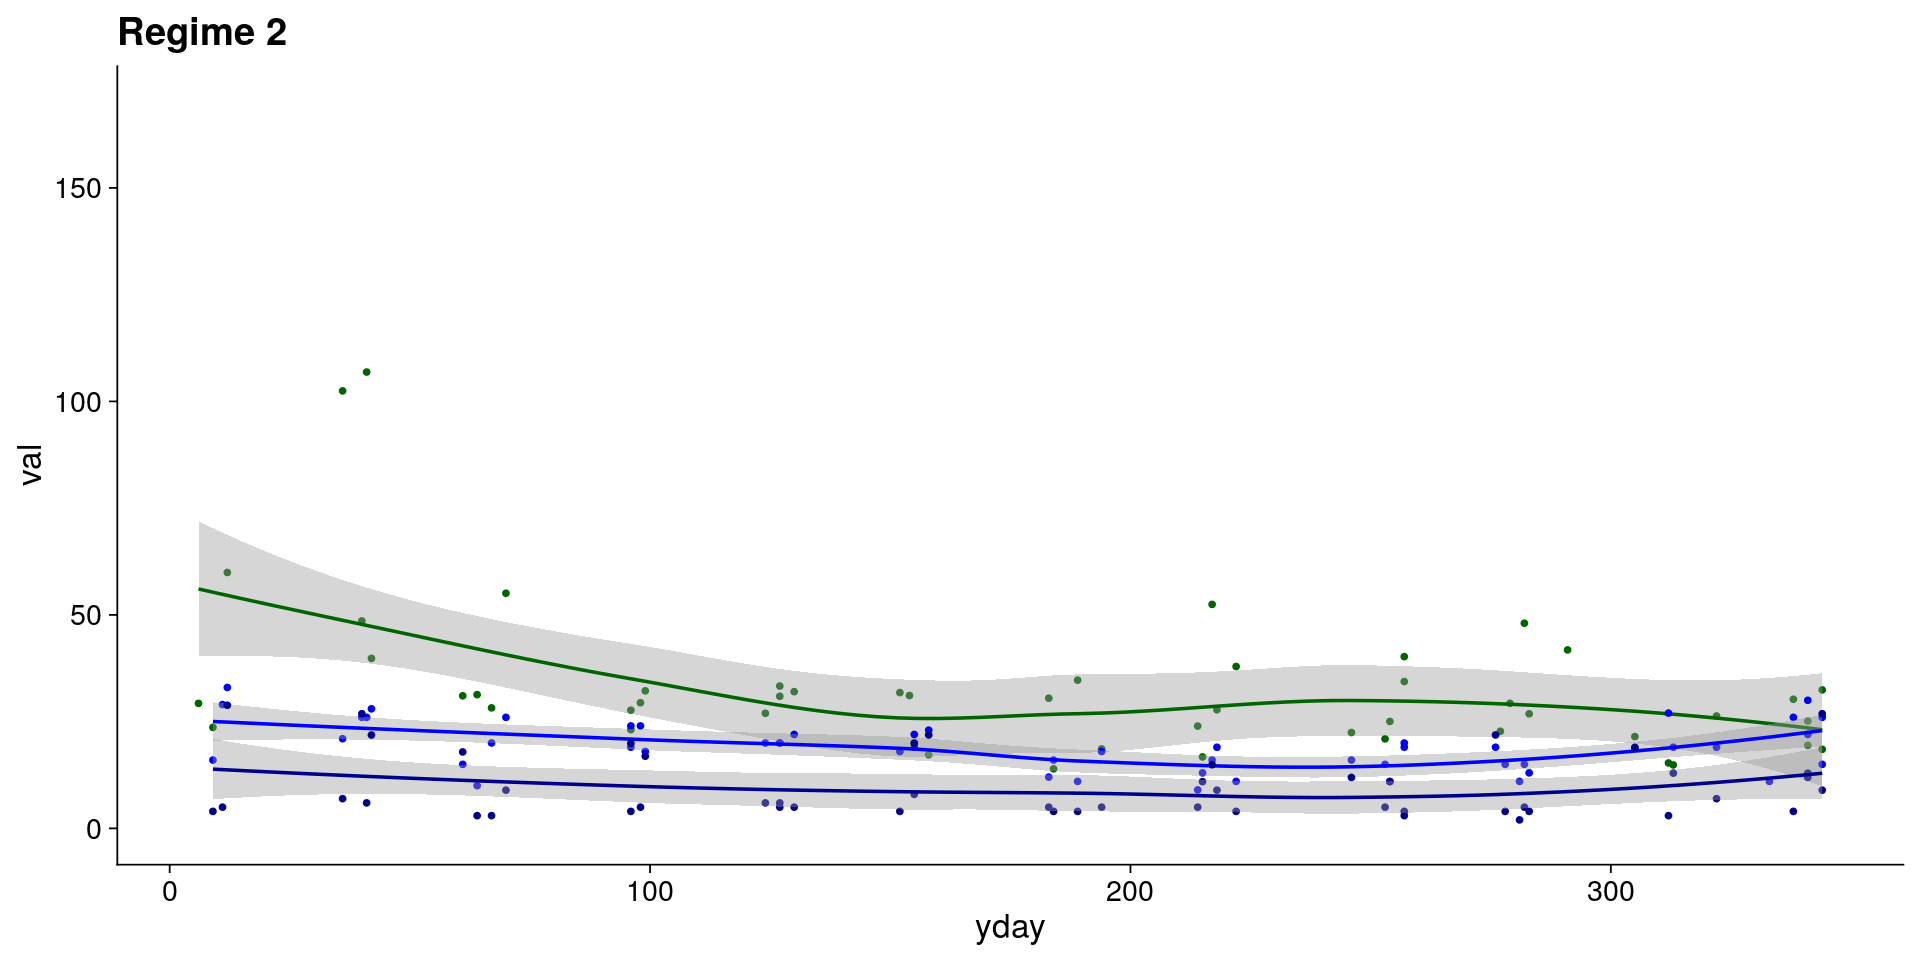

In [125]:
ggplot() + geom_point(data=CHLATS[CHLATS$reg == 2  & CHLATS$spec=='Tchla', ], aes(x=yday,y=val), col='darkgreen') + 
geom_smooth(data=CHLATS[CHLATS$reg == 2  & CHLATS$spec=='Tchla', ], aes(x=yday,y=val), col='darkgreen') +
geom_point(data=MLD2015_split[MLD2015_split$reg == 2, ], aes(x=yday,y=depth), col='blue') +
geom_smooth(data=MLD2015_split[MLD2015_split$reg == 2, ], aes(x=yday,y=depth), col='blue')+
geom_point(data=MLD2019_split[MLD2019_split$reg == 2, ], aes(x=yday,y=depth), col='darkblue') +
geom_smooth(data=MLD2019_split[MLD2019_split$reg == 2, ], aes(x=yday,y=depth), col='darkblue')+
ggtitle('Regime 2')+ ylim(0,170) +
theme_cowplot(20) 

In [129]:
write.csv(X21Iso_split[X21Iso_split$reg == 1,],file='X21Iso_r1.csv')
write.csv(X21Iso_split[X21Iso_split$reg == 2,],file='X21Iso_r2.csv')

In [127]:
X21Iso_split[X21Iso_split$reg == 2,]

,date,depth,reg,month,yday
124,2006-07-04,108,2,07,184
125,2006-08-03,72,2,08,214
126,2006-09-12,113,2,09,254
127,2006-10-10,103,2,10,282
128,2006-11-02,124,2,11,305
129,2006-12-05,127,2,12,338
130,2007-02-06,42,2,02,36
131,2007-03-06,35,2,03,64
132,2007-04-10,38,2,04,99
133,2007-05-08,69,2,05,127
